# Мазур Анастасия Вадимовна, 316 группа ВМК МГУ
## Копула
### 10 Вариант

In [50]:
# Выключаю вывод предупреждающих сообщений warning
oldw <- getOption("warn")
options(warn = -1)

install.packages("copula")
library(copula)

install.packages("SciViews")
library("SciViews")


The downloaded binary packages are in
	/var/folders/pb/g1nm2p2s2_v8x88dfjw78sf80000gn/T//RtmpS8ohVs/downloaded_packages

The downloaded binary packages are in
	/var/folders/pb/g1nm2p2s2_v8x88dfjw78sf80000gn/T//RtmpS8ohVs/downloaded_packages


In [51]:
data <- readRDS('./Copula_Test/var_10.rds')
names(data)

[1] "predictor"                 "predictor_DistrType"      
[3] "predictor_DistrParameters" "output"                   
[5] "output_DistrType"          "output_DistrParameters"

### 1. Постройте график predictor vs output

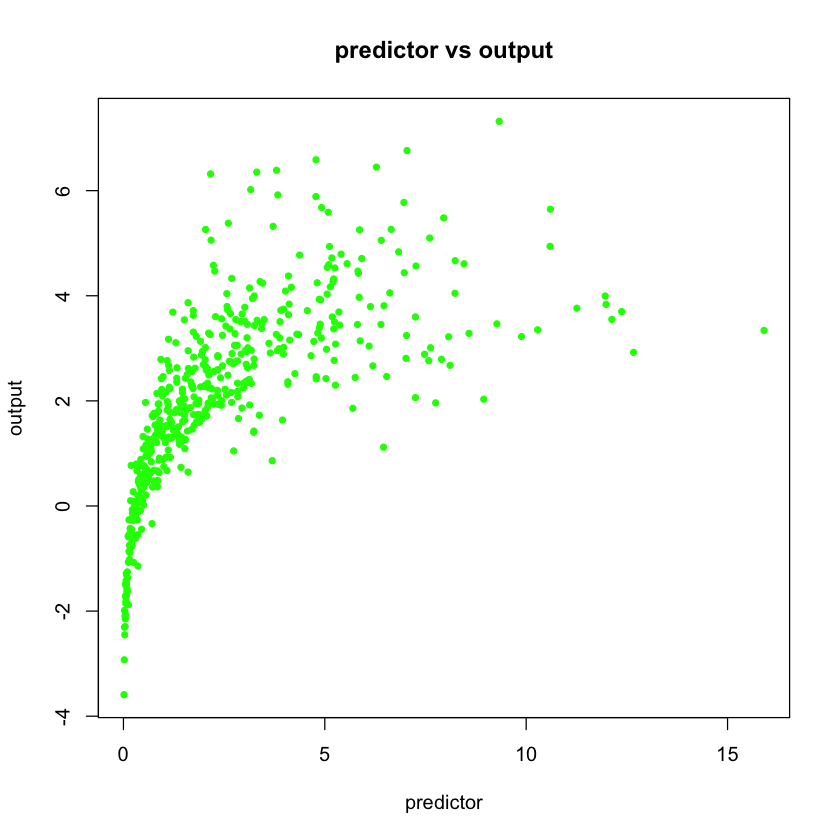

In [52]:
plot(data$predictor,data$output,main = 'predictor vs output', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')

### 2. Постройте график эмпирической копулы, построенной с помощью метода pobs()

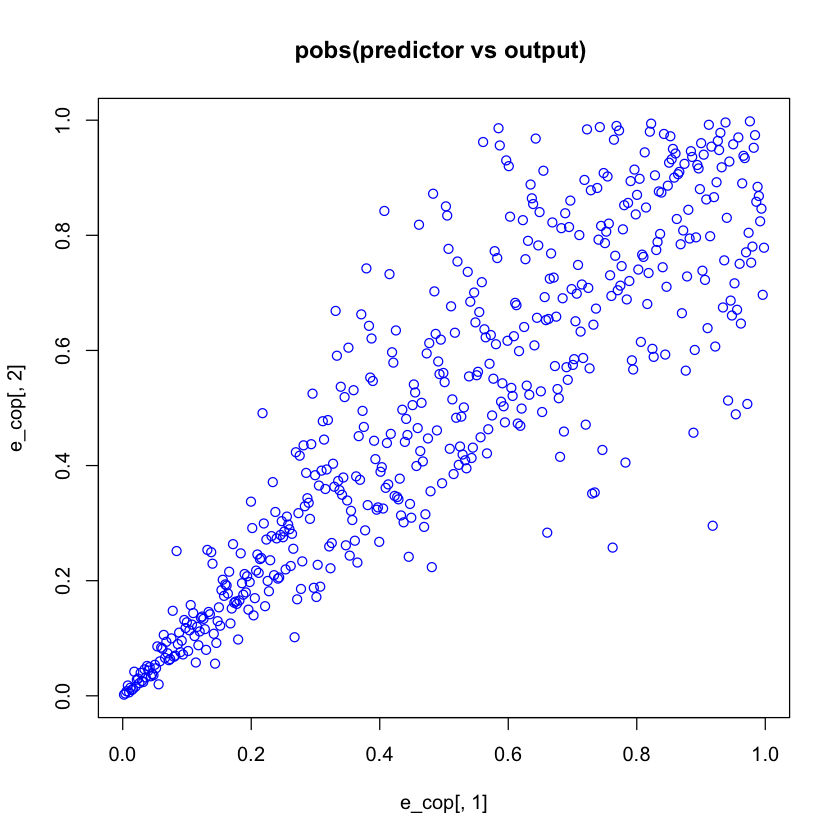

In [53]:
predictor_output <- cbind(data$predictor,data$output)
e_cop <-pobs(predictor_output)
plot(e_cop[,1],e_cop[,2],pch = 21,main ="pobs(predictor vs output) ",col = "blue")

### 3. Создайте 4 объекта копул c произвольным значением параметра и размерности 2.

In [54]:
#Normal copula
  normal_copula<-normalCopula(param=0,dim=2)
#Student copula
  t_copula <-ellipCopula(family = "t",param = 0,dim = 2)
#Frank copula
  Frank_copula<-frankCopula(param=5,dim=2)
#Clayton
  Clayton_copula<-claytonCopula(param=5,dim=2)

In [55]:
myFitCopula <- function(Clayton_copula,data,method = 'ml'){
  tryCatch(#Сecuting more than one expression you need curly braces.
    {
      y = fitCopula(Clayton_copula,data,method)
      return(y)
    },
    error=function(error_message) {
      return(NA)
    }
  )
}

In [56]:
data_copy <- data

In [57]:
data_fit <- cbind(data_copy$predictor,data_copy$output)
fitCopula(normal_copula,pobs(data_fit),method='ml')

Call: fitCopula(normal_copula, data = pobs(data_fit), ... = pairlist(method = "ml"))
Fit based on "maximum likelihood" and 500 2-dimensional observations.
Copula: normalCopula 
rho.1 
0.856 
The maximized loglikelihood is 325.4 
Optimization converged

In [58]:
data_fit <- cbind(data_copy$predictor,data_copy$output)
fitCopula(t_copula,pobs(data_fit),method='ml')

Call: fitCopula(t_copula, data = pobs(data_fit), ... = pairlist(method = "ml"))
Fit based on "maximum likelihood" and 500 2-dimensional observations.
Copula: tCopula 
 rho.1     df 
0.8809 2.6719 
The maximized loglikelihood is 357.5 
Optimization converged

In [59]:
data_fit <- cbind(data_copy$predictor,data_copy$output)
fitCopula(Frank_copula,pobs(data_fit),method='ml')

Call: fitCopula(Frank_copula, data = pobs(data_fit), ... = pairlist(method = "ml"))
Fit based on "maximum likelihood" and 500 2-dimensional observations.
Copula: frankCopula 
alpha 
11.58 
The maximized loglikelihood is 359.4 
Optimization converged

In [60]:
data_fit <- cbind(data_copy$predictor,data_copy$output)
fitCopula(Clayton_copula,pobs(data_fit),method='ml')

Call: fitCopula(Clayton_copula, data = pobs(data_fit), ... = pairlist(method = "ml"))
Fit based on "maximum likelihood" and 500 2-dimensional observations.
Copula: claytonCopula 
alpha 
5.018 
The maximized loglikelihood is 475.6 
Optimization converged

### 4. Оцените по эмпирической копуле все четыре копулы, как это делалось в лекции, и выдайте оценку параметров.

In [61]:
Gaussian.Copula.fit<-fitCopula(normal_copula, 
                              e_cop, 
                              method = "ml",
                             optim.control = list(maxit=1000))
parameters <- Gaussian.Copula.fit@copula@parameters
parameters

[1] 0.8560184

In [62]:
Student.Copula.fit<-fitCopula(t_copula, 
                              e_cop, 
                            method = "ml",
                            optim.control = list(maxit=1000))
parameters <- Student.Copula.fit@copula@parameters
parameters

[1] 0.8809092 2.6718932
attr(,"fixed")
[1] FALSE FALSE

In [63]:
Frank.Copula.fit<-fitCopula(Frank_copula, 
                            e_cop, 
                            method = "ml",
                            optim.method = "BFGS", 
                            optim.control = list(maxit=1000))
parameters <- Frank.Copula.fit@copula@parameters
parameters

[1] 11.5809

In [64]:
Clayton.Copula.fit<-fitCopula(Clayton_copula, 
                              e_cop, 
                              method = "ml",
                              optim.control = list(maxit=1000))
parameters <- Clayton.Copula.fit@copula@parameters
parameters

[1] 5.017955

### 5. Выберете наиболее адекватный к данным тип копулы

In [65]:
Gaussian.Copula.fit@loglik

[1] 325.4026

In [66]:
Student.Copula.fit@loglik

[1] 357.4573

In [67]:
Frank.Copula.fit@loglik

[1] 359.3615

In [68]:
Clayton.Copula.fit@loglik

[1] 475.5582

**Лучшей для этих данных является копула Клейтона**

#### 5.1 Параметры выбранной копулы сохраните в переменную best_parameters.

In [69]:
parameters <- Clayton.Copula.fit@copula@parameters
(best_parameters <- parameters)

[1] 5.017955

### 6. Постройте графики выбранной копулы с помощью методов persp(),contour().

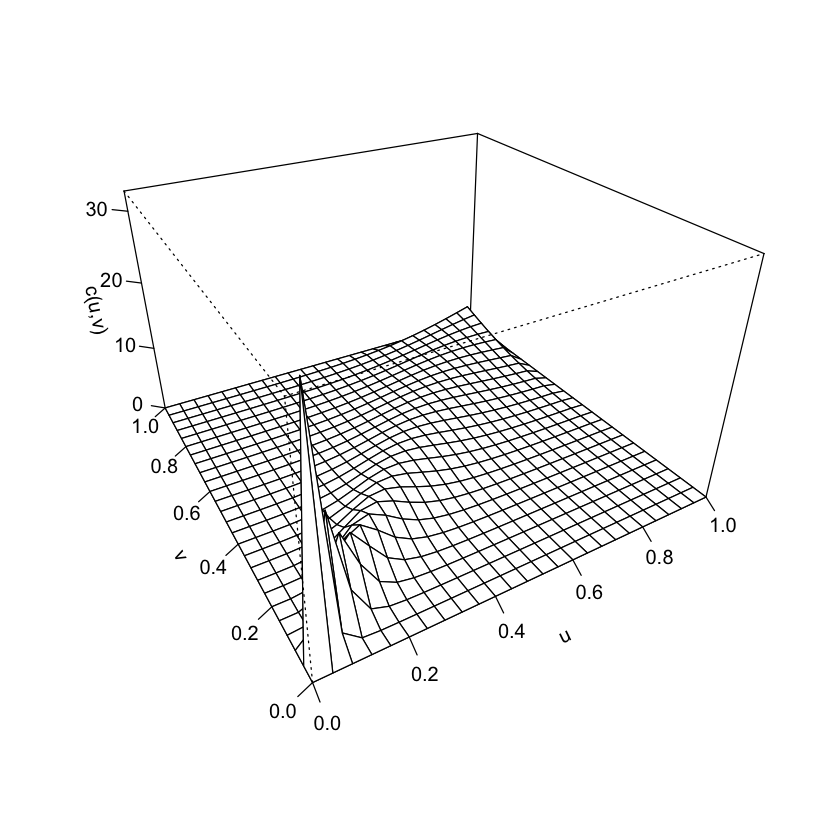

In [70]:
persp(Clayton_copula, dCopula ,xlab="u", ylab="v", zlab="c(u,v)")

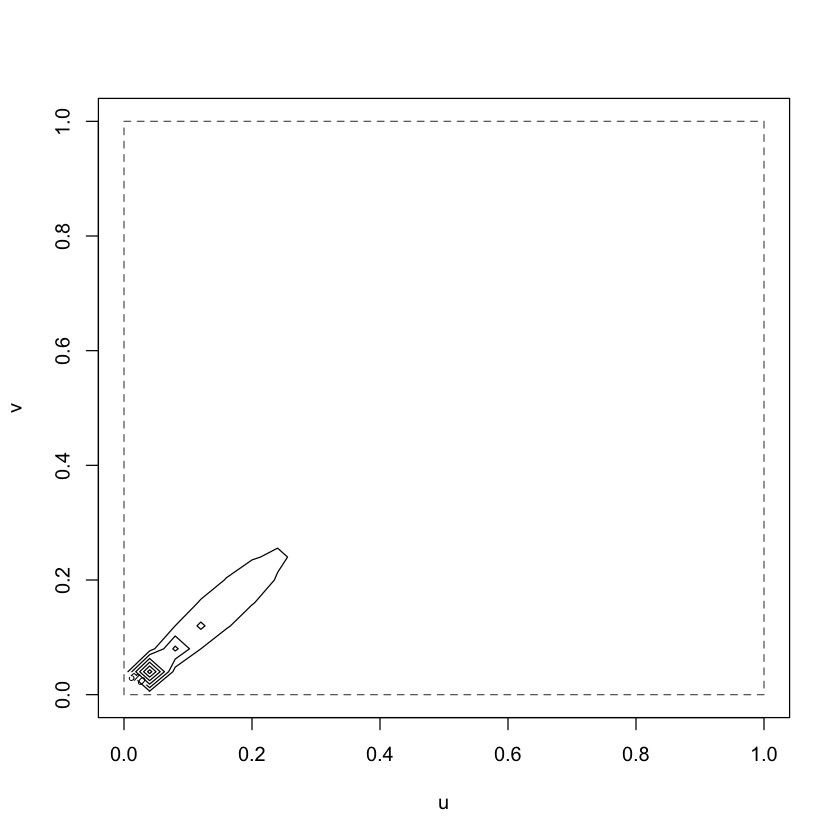

In [71]:
contour(Clayton_copula,dCopula, xlab="u", ylab="v")

### 7. Перейдите к копуле согласно частным распределениям predictor и output. Пусть в варианте частные распределения заданы такие

In [72]:
  data$predictor_DistrType

[1] "exponential"

In [73]:
  data$predictor_DistrParameters

[1] 1.0 0.4

In [74]:
  data$output_DistrType

[1] "logistic"

In [75]:
  data$output_DistrParameters

[1] 2 1

Переходим к копуле согласно частных распределений

In [76]:
predictor.copula <- pexp(data$predictor,rate = data$predictor_DistrParameters[2])
output.copula <- plogis(data$output, location = data$output_DistrParameters[1], scale=data$output_DistrParameters[2])

In [77]:
data$output_DistrParameters[2]

[1] 1

### 8. Постройте копулу согласно частным распределениям

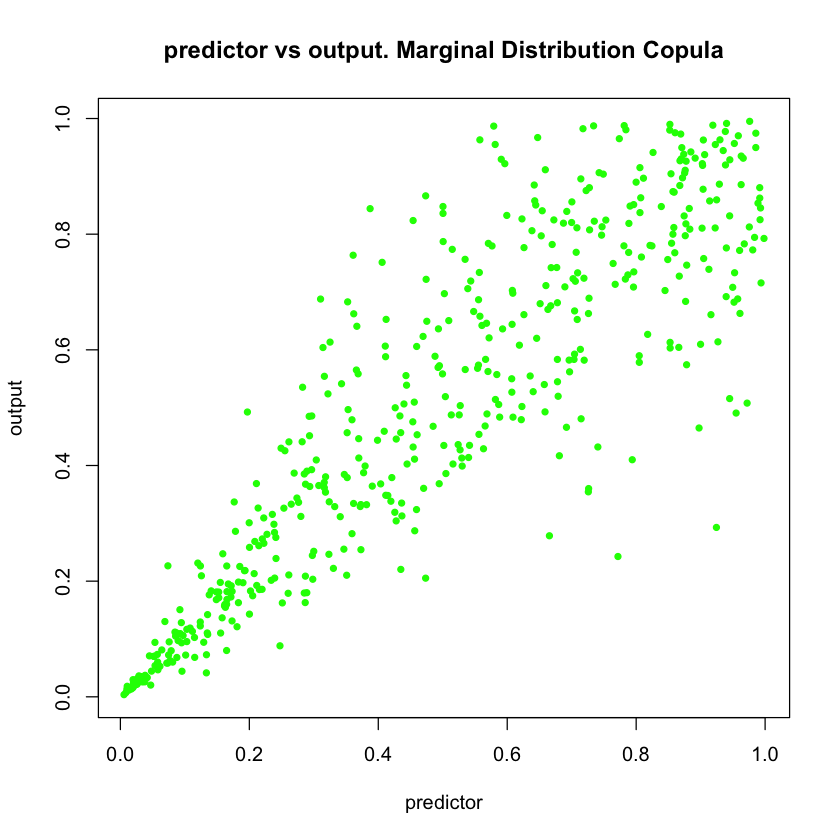

In [78]:
plot(predictor.copula,output.copula,main = 'predictor vs output. Marginal Distribution Copula', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')

### 9. Вычислите квантиль для уровня 95%, для заданных частных распределений. Предположим, что лучшей выбрана normal копула.

In [79]:
quantileLevel <- function(numCopula,copula, theta,alpha)
{
  if (numCopula == 1)
  {
  #Gaussian    
    q <- pnorm(qnorm(alpha) * sqrt(1-theta*theta)  + theta * qnorm(copula[,1]))
  }
  if (numCopula == 2)
  {
    nu <- theta[2]
    mn <- theta[1]
    k <- sqrt(
    (nu + (qt(copula[,1], df=nu) ^ 2)) * (1 - mn ^ 2) / 
        (nu + 1)
    )
    q <- pt(qt(alpha, nu + 1) * k + mn * qt(copula[,1], df=nu), df=nu)
    #Student
  }
  if (numCopula == 3)
  {
    #Frank
    q <- -(1/theta) * ln(1 - (alpha*(1 - exp(-theta)))/(exp(-theta * copula[,1]) + alpha * (1 - exp(-theta*copula[,1]))))
  }
  if (numCopula == 4)
  {
    q <- ((alpha ^ (-theta / (1 + theta)) - 1) * copula[,1] ^ (-theta) + 1) ^ (-1/theta)
    #Clayton
  }
  return(q)  
}

In [92]:
copula <- cbind(predictor.copula,output.copula)
alpha <- 0.95
parameters <- Clayton.Copula.fit@copula@parameters
quantile <- quantileLevel(copulanum,copula, parameters,alpha)

### 10. Определите аномальные пары переменных для которых переменная output в копуле превосходит квантиль. 
Определяем индексы таких переменных.

In [93]:
(anomalindex <- which(copula[,2]>quantile))

[1]  58  88 121 123 180 230 303 319 329 407 417 431 460

Рисуем копулу, цветом выделяем аномальные значения

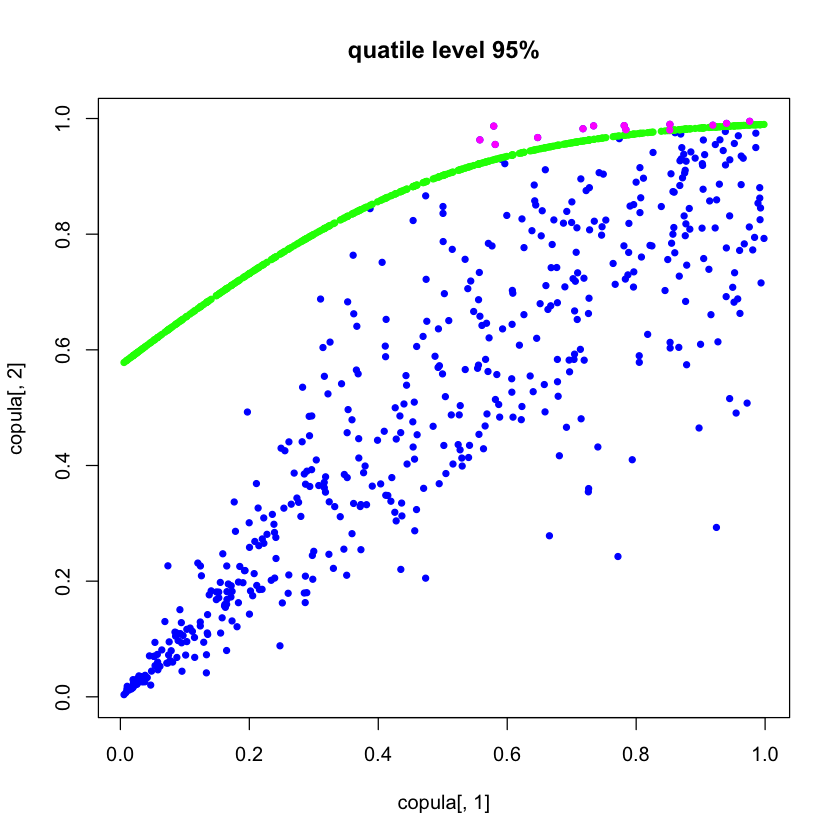

In [94]:
plot(copula[,1],copula[,2],pch =20,col = "blue",main = "quatile level 95%")
points(copula[,1],quantile,col = "green",pch = 20)
points(copula[anomalindex,1],copula[anomalindex,2],col = "magenta",pch = 20)

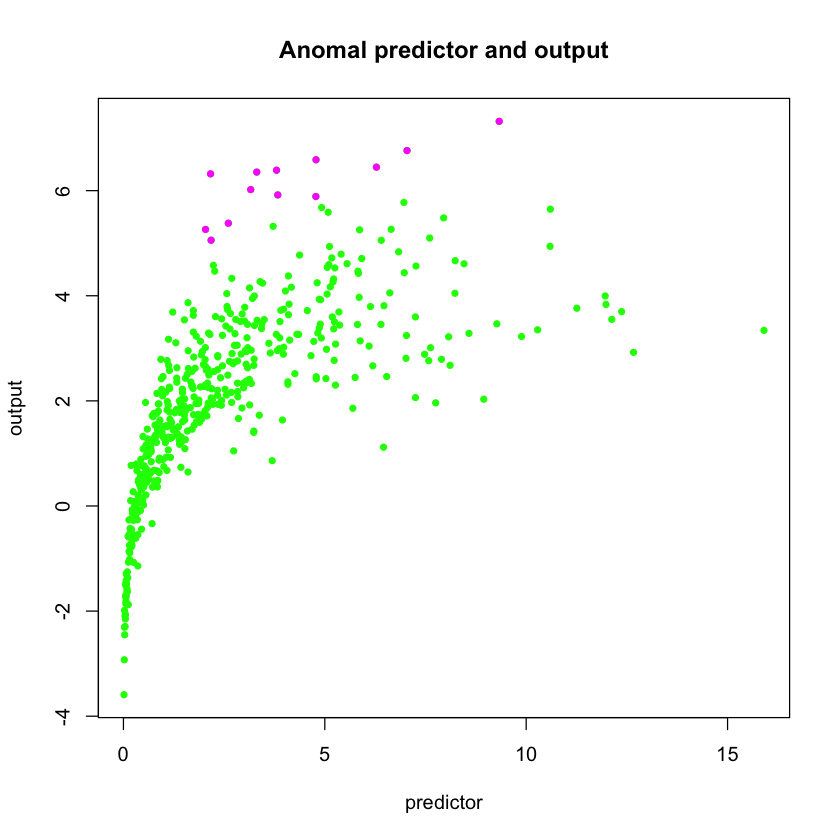

In [95]:
plot(data$predictor,data$output,main = 'Anomal predictor and output', col = 'green',pch = 20,xlab = 'predictor', ylab = 'output')
points(data$predictor[anomalindex],data$output[anomalindex],col = "magenta",pch = 20)

### 11. Находим аномальные переменные в исходных pedictor и output.

In [96]:
anomal_predictor <- data$predictor[anomalindex]
anomal_output    <- data$output[anomalindex]
head(anomal_predictor)

[1] 9.329628 4.777787 7.041737 4.781795 2.604840 3.801582

In [97]:
head(anomal_output)

[1] 7.318980 5.888769 6.762596 6.587527 5.380159 6.388865

Выделим цветом пары аномальных переменных

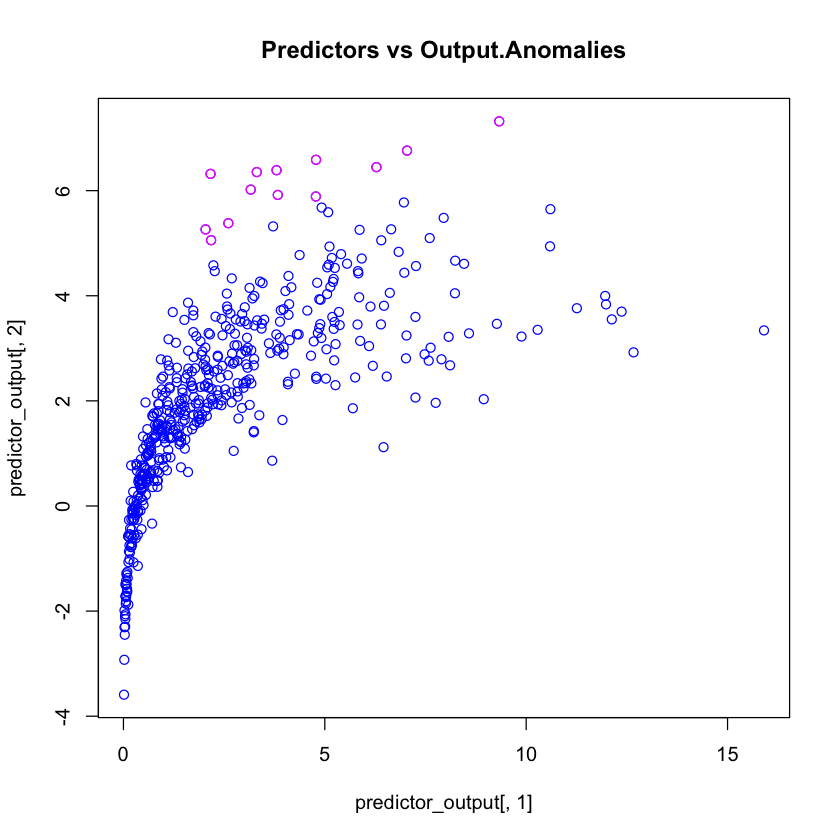

In [98]:
plot(predictor_output[,1], predictor_output[,2],pch = 21,col= "blue",main ="Predictors vs Output.Anomalies")
points(anomal_predictor, anomal_output,pch = 21,col= "magenta")

In [99]:
variant <- 10

In [100]:
copulanum <- 3
copulaNames <- c("normal", "student", "clayton", "frank")
copulaName <-copulaNames[copulanum]
copulaName

[1] "clayton"

In [89]:
anomal_predictor <- data$predictor[anomalindex]
anomal_output <- data$output[anomalindex]

In [90]:
myResult <- list(variant = variant,
                 copulaName = copulaName,
                 predictor.copula = predictor.copula,
                 output.copula = output.copula,  
                 best_parameters = best_parameters,
                 anomal_predictor= anomal_predictor,
                 anomal_output= anomal_output)

In [91]:
saveRDS(myResult,"result.rds")